## Loan Status Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
plt.style.use('fivethirtyeight')

## Prepare data

In [2]:
df = pd.read_csv('/content/loan_data (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(381, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
df.drop(columns=['Loan_ID'] , axis=1 ,inplace= True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
print(f"The shape of the Data Frame is: {df.shape}")

The shape of the Data Frame is: (381, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [9]:
#Statistical informations
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
#Show duplicated rows
df.duplicated().sum()

0

In [ ]:
#Show NaN values
df.isna().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


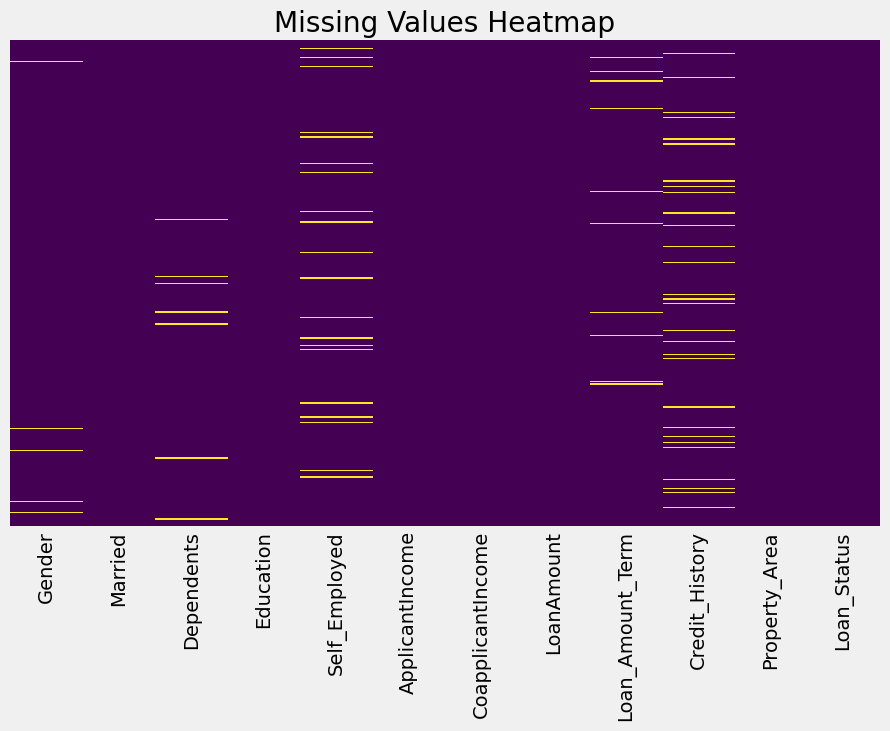

In [ ]:
# prompt: create a heatmap for missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Explore

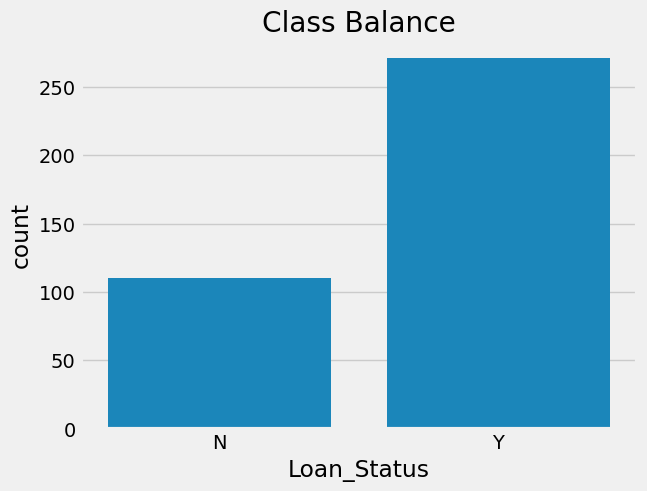

In [ ]:
sns.countplot(x=df['Loan_Status'])
plt.title('Class Balance');

In [ ]:
df = df.replace(to_replace= '3+',value=4)
df['Dependents'].value_counts()

,count
Dependents,
0,234
2,59
1,52
4,28


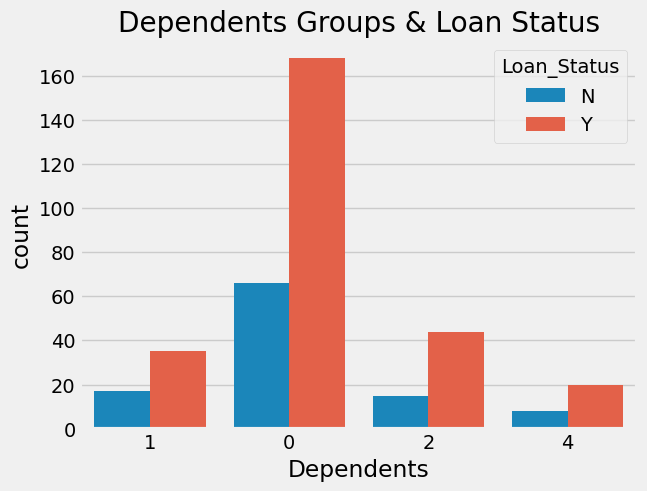

In [ ]:
sns.countplot(x= df['Dependents'] , hue= df['Loan_Status'])
plt.title('Dependents Groups & Loan Status');

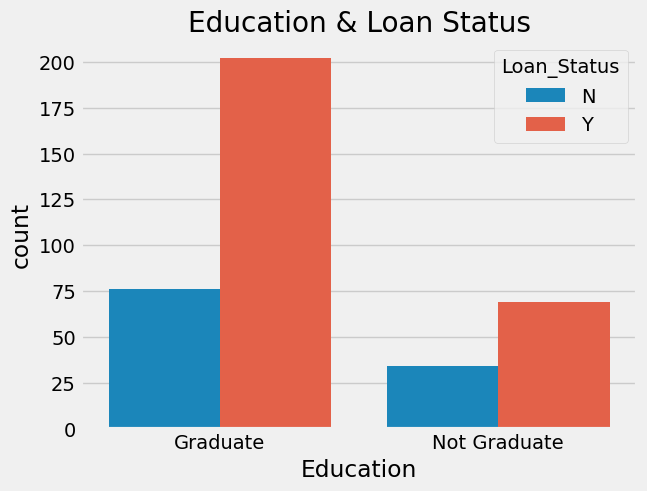

In [ ]:
sns.countplot(x= df['Education'] , hue= df['Loan_Status'])
plt.title('Education & Loan Status');

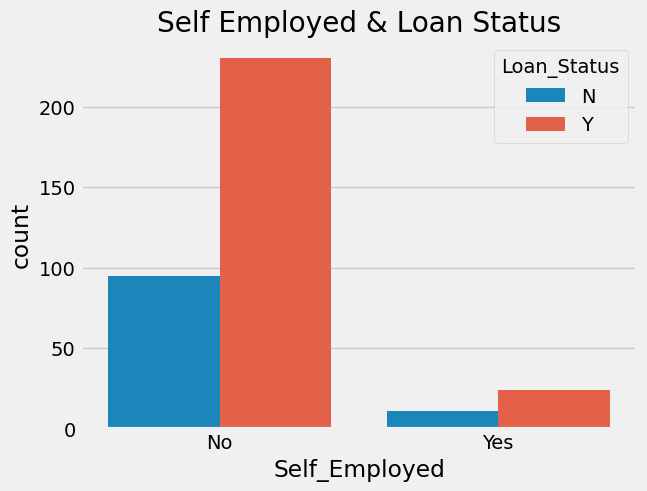

In [ ]:
sns.countplot(x= df['Self_Employed'] , hue= df['Loan_Status'])
plt.title('Self Employed & Loan Status');

## Split

In [ ]:
target= 'Loan_Status'
X= df.drop(columns=[target])
y= df[target]
print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

X Shape (381, 11)
y Shape (381,)


In [ ]:
X_test , X_train , y_test , y_train = train_test_split(X,y,test_size= 0.2 , random_state= 42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (77, 11)
y_train shape: (77,)
X_test shape: (304, 11)
y_test shape: (304,)


## Baseline

In [ ]:
acc_baseline = df['Loan_Status'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.7112860892388452


## iterate

In [ ]:
def train(model , model_name):
    model.fit(X_train, y_train)
    print(f'training accuracy of {model_name} is: {model.score(X_test , y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(X_test , y_test)}')
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        svm_model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(y_test , model.predict(X_test)))

## SVM

In [ ]:
#Build Model
svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)

In [ ]:
train(svm_model , "SVC" )

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'int', 'str']

In [ ]:
conf_matrix(svm_model)

In [ ]:
class_report(svm_model)

## Logistic Regression

In [ ]:
#Build Model
Logistic_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    LogisticRegression()
)

In [ ]:
train(Logistic_model , "LogisticRegression" )

In [ ]:
conf_matrix(Logistic_model)

In [ ]:
class_report(Logistic_model)

## Communicate

In [ ]:
features = X_test.columns
importances= Logistic_model.named_steps['logisticregression'].coef_[0]

In [ ]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

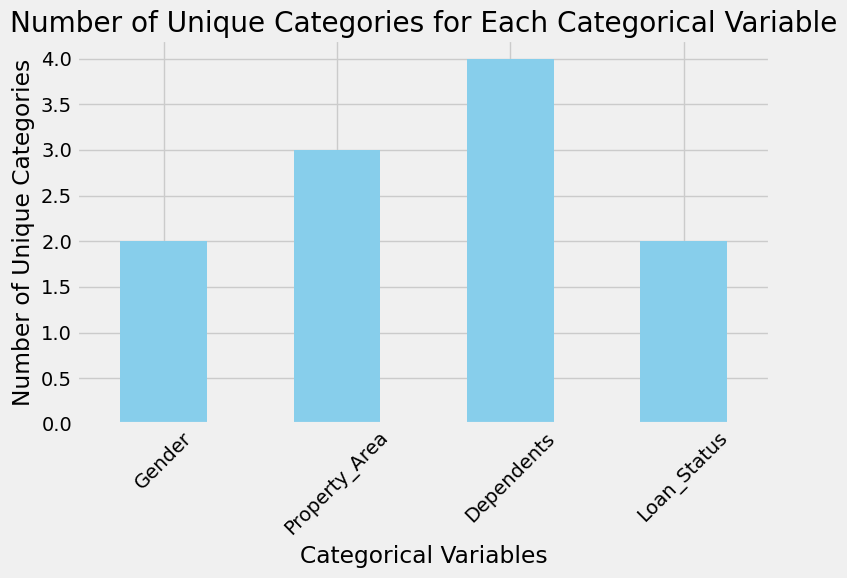

In [ ]:
# List of categorical variables to check
categorical_columns = ['Gender', 'Property_Area', 'Dependents', 'Loan_Status']

# Find the number of unique categories for each categorical variable
unique_categories = df[categorical_columns].nunique()

# Create a bar plot
plt.figure(figsize=(8, 6))
unique_categories.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Number of Unique Categories for Each Categorical Variable')
plt.xlabel('Categorical Variables')
plt.ylabel('Number of Unique Categories')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cat_col =df.select_dtypes(include='object')

In [ ]:
for col in cat_col:
  print(df[col].value_counts())

Gender
Male      291
Female     85
Name: count, dtype: int64
Married
Yes    228
No     153
Name: count, dtype: int64
Dependents
0    234
2     59
1     52
4     28
Name: count, dtype: int64
Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64
Self_Employed
No     325
Yes     35
Name: count, dtype: int64
Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64
Loan_Status
Y    271
N    110
Name: count, dtype: int64


<ipython-input-45-3d46958494c9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_approval_rate.index, y=loan_approval_rate['Approval_Rate'], palette='Set2')


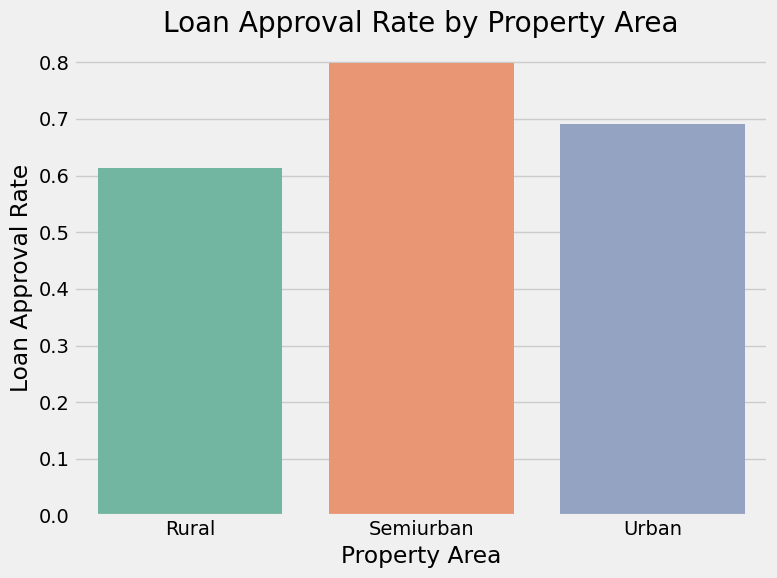

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the loan approval rate by Property_Area
loan_approval_rate = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the approval rate (assuming 'Y' stands for approved loans)
loan_approval_rate['Approval_Rate'] = loan_approval_rate['Y']  # 'Y' is the approved loan status

# Plot the approval rate by Property_Area
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_approval_rate.index, y=loan_approval_rate['Approval_Rate'], palette='Set2')

# Add labels and title
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Approval Rate')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: create dummies for categorical col

# Create dummy variables for categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype = int )
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
1,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
2,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
3,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
4,LP001013,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1


In [ ]:
df.shape

(381, 15)

<Axes: >

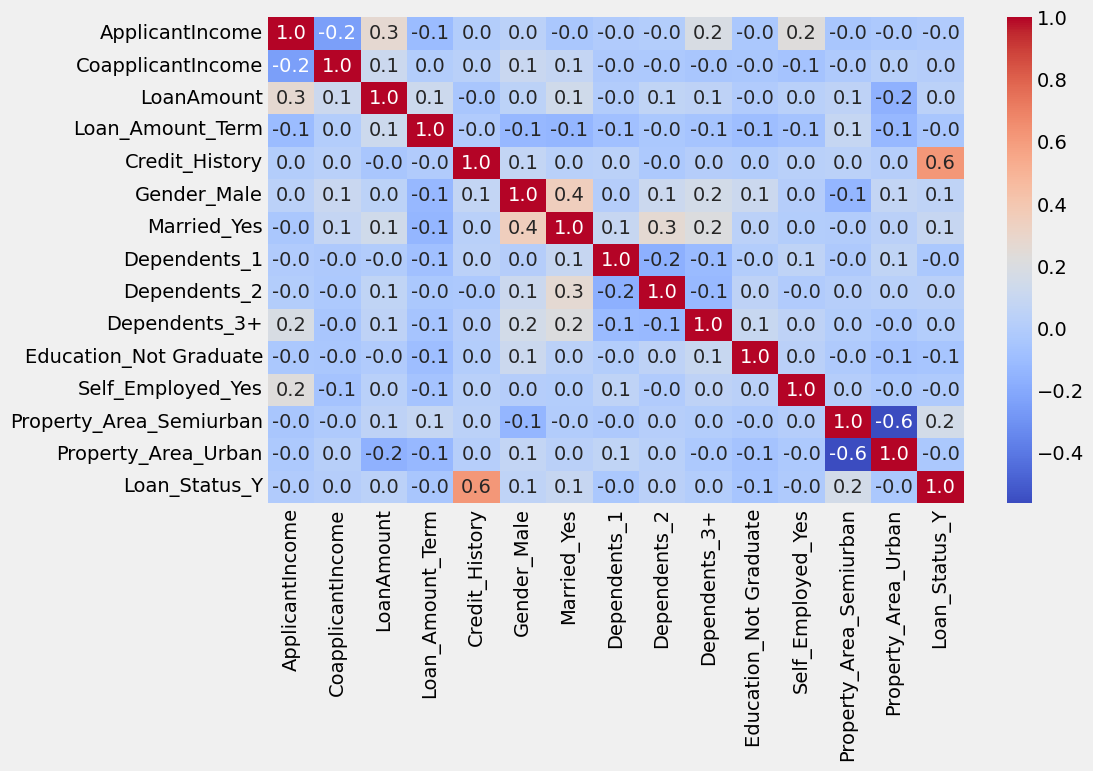

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'coolwarm')

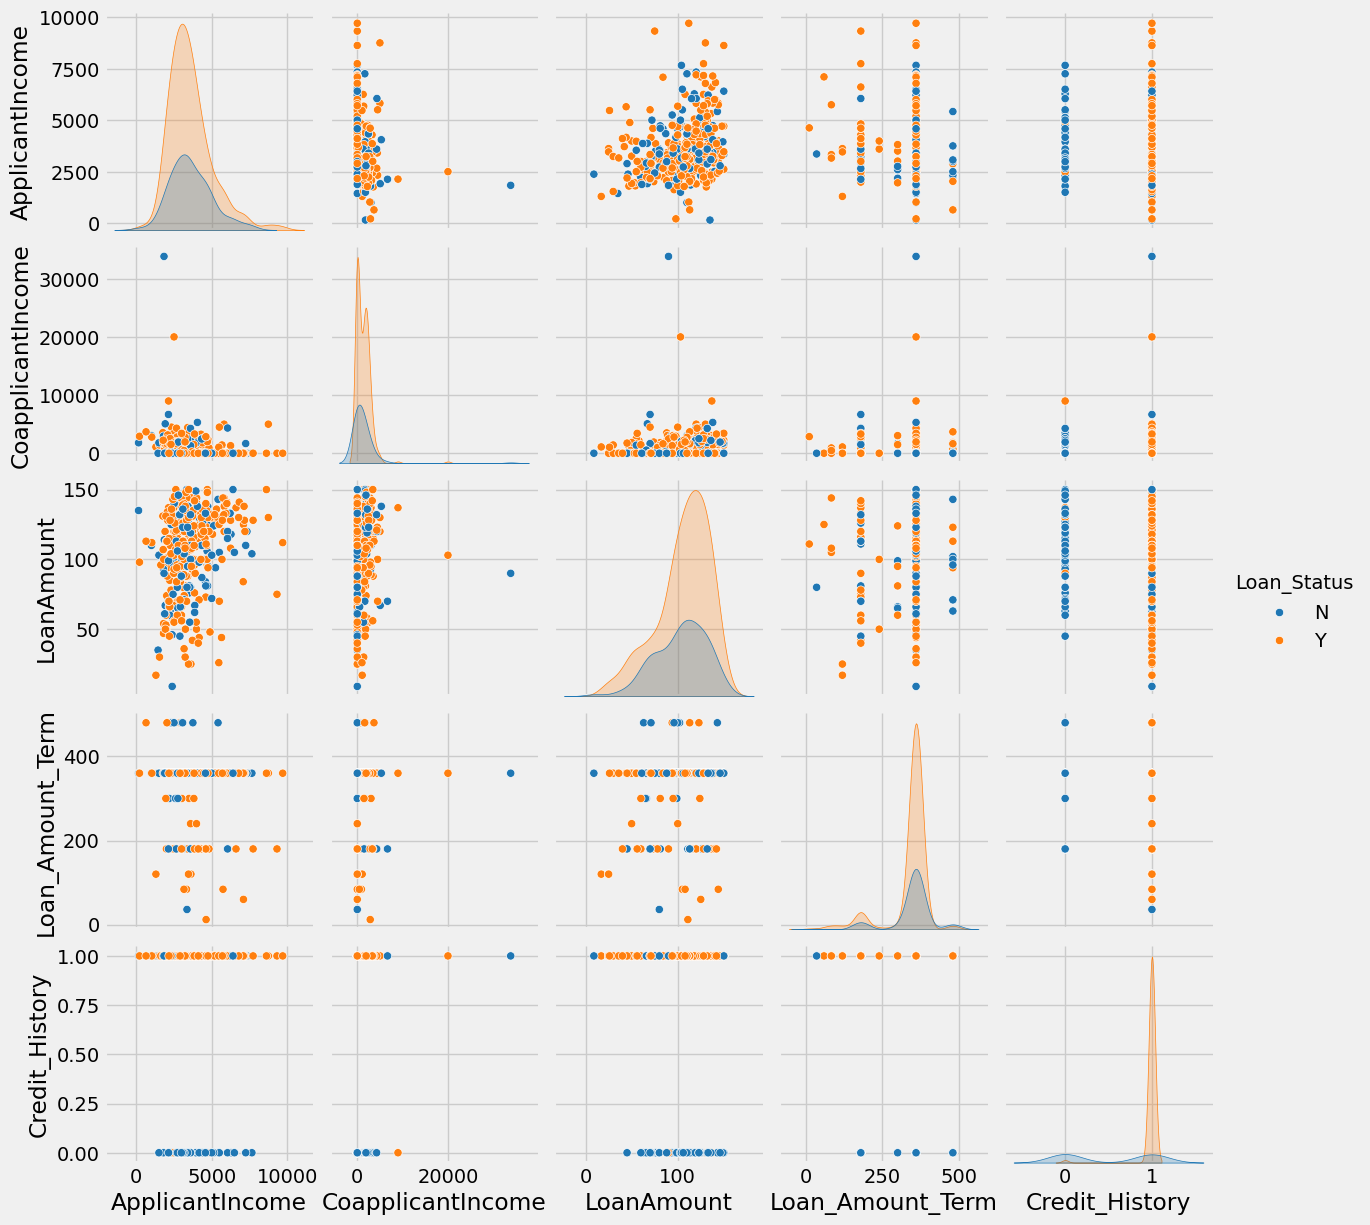

In [ ]:
sns.pairplot(df , diag_kind = "kde", hue="Loan_Status", palette = 'tab10')

<ipython-input-75-c3dffc6dd399>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loan_amount.index, y=average_loan_amount.values,palette = 'magma')


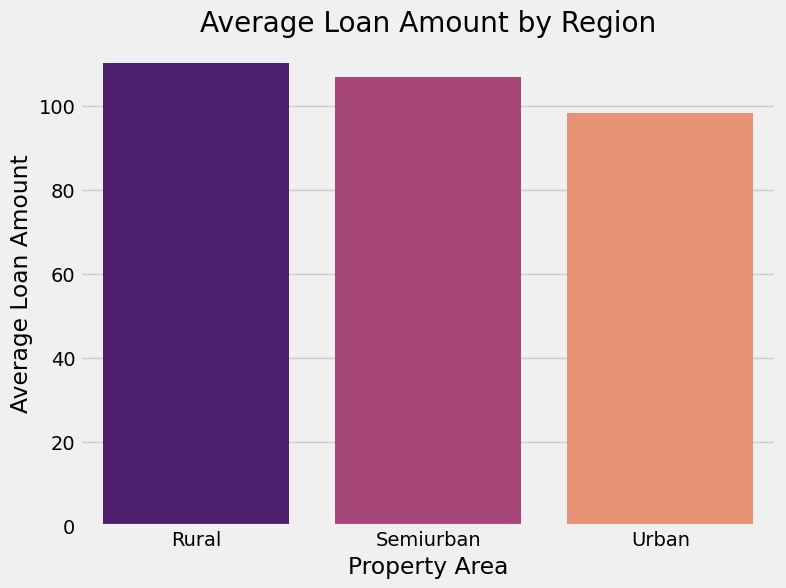

In [ ]:
# prompt: plot for average Loan Amount , region wise

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns 'LoanAmount', 'Property_Area', and 'Loan_Status'
# and that LoanAmount is numeric

# Calculate the average loan amount for each region
average_loan_amount = df.groupby('Property_Area')['LoanAmount'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_loan_amount.index, y=average_loan_amount.values,palette = 'magma')
plt.xlabel('Property Area')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Region')
plt.show()

In [ ]:
average_loan_amount

,LoanAmount
Property_Area,
Rural,110.264151
Semiurban,106.805369
Urban,98.396825


In [ ]:
# prompt: What percentage of loans were approved (Loan_Status = "Y") in the dataset?

loan_approval_percentage = df['Loan_Status'].value_counts(normalize=True) * 100
print(f"Loan Approval Percentage:\n{loan_approval_percentage}")

Loan Approval Percentage:
Loan_Status
Y    71.128609
N    28.871391
Name: proportion, dtype: float64


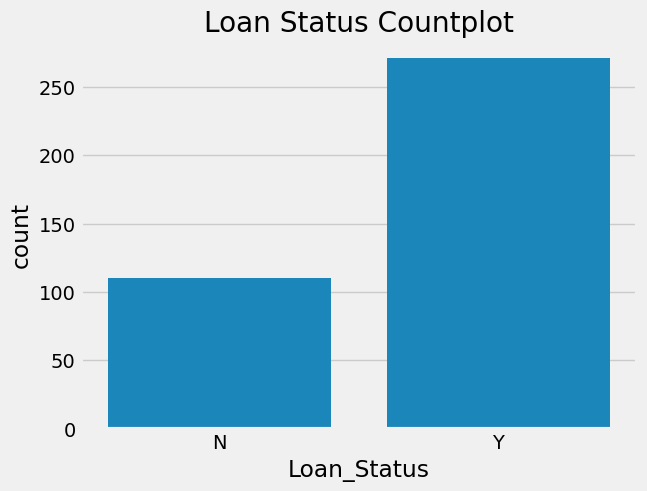

In [ ]:
# prompt: count plot loan status

sns.countplot(x=df['Loan_Status'])
plt.title('Loan Status Countplot');
plt.show()

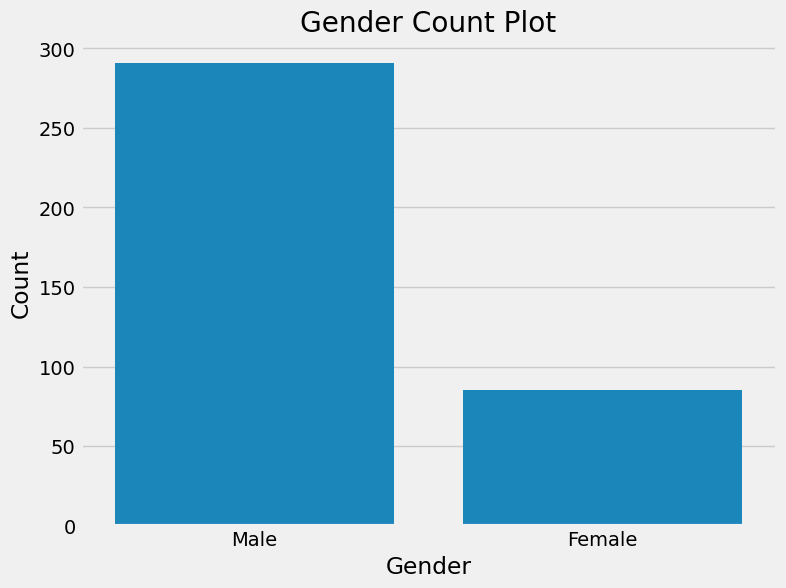

In [ ]:
# prompt: Gender count plot

# Assuming 'df' is your DataFrame and it has a 'Gender' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count Plot')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.773936
Female,0.226064


<Axes: xlabel='LoanAmount', ylabel='Count'>

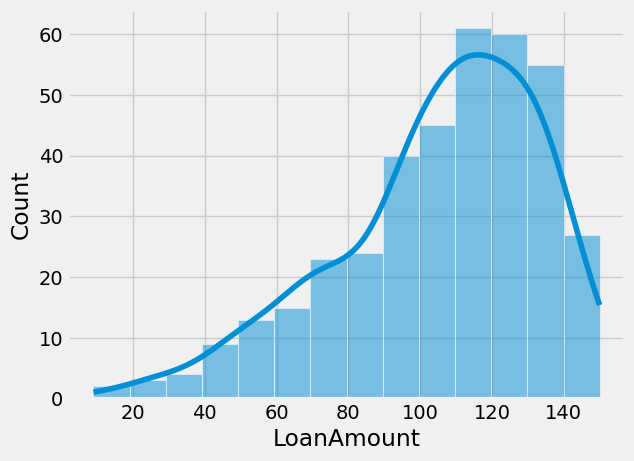

In [ ]:
sns.histplot(x = 'LoanAmount', data = df, kde = True,)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

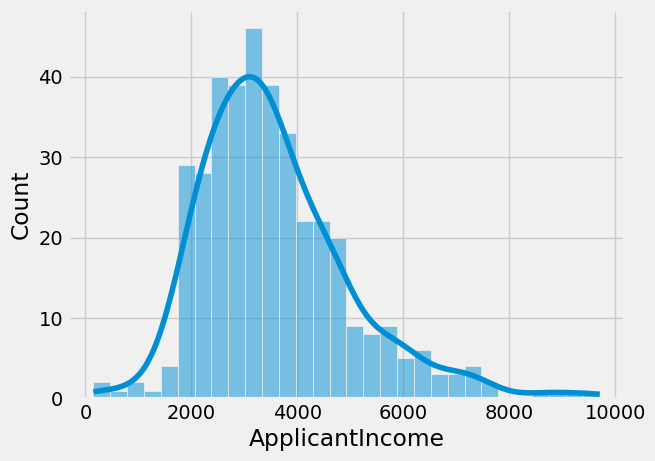

In [ ]:

sns.histplot(x = 'ApplicantIncome', data = df, kde = True,bins = 30)

In [ ]:
# prompt: loan amount vs education category

# Assuming 'df' is your DataFrame and it has columns 'LoanAmount', 'Education', and 'Loan_Status'
# and that LoanAmount is numeric

# Calculate the average loan amount for each education level
average_loan_amount_by_education = df.groupby('Education_Graduate')['LoanAmount'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_loan_amount_by_education.index, y=average_loan_amount_by_education.values)
plt.xlabel('Education')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Education Level')
plt.show()
average_loan_amount_by_education

KeyError: 'Education_Graduate'

<ipython-input-96-5f4262421a65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Amount_Term', data=df, palette = 'dark')


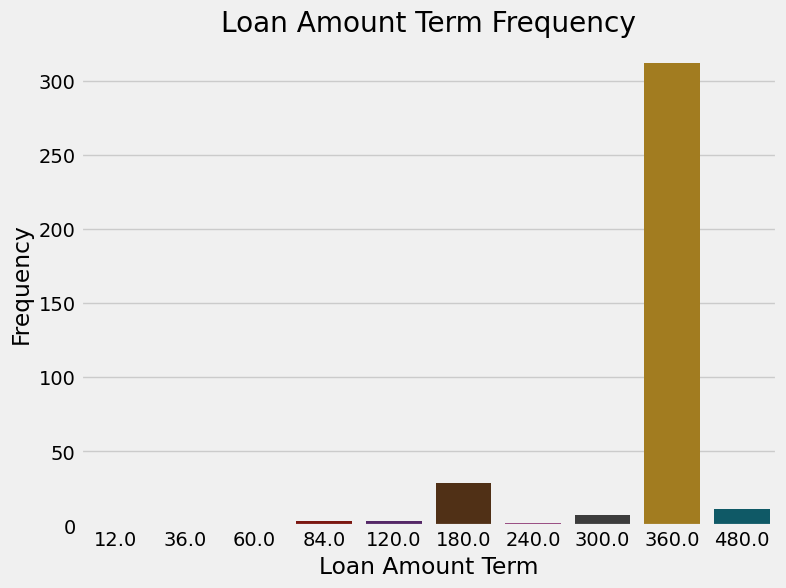

In [ ]:
# prompt: Loan_Amount_Term frequency

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'dark')
plt.title('Loan Amount Term Frequency')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: Which group has the highest average income?
# Answer choices
# Married males
# Married females
# Single males
# Single females

# Calculate the average income for each group
average_income_by_group = df.groupby(['Married_Yes', 'Gender_Male'])['ApplicantIncome'].mean().unstack()

# Find the group with the highest average income
highest_income_group = average_income_by_group.max().idxmax()

# Map the index back to the group names
group_mapping = {
    (1, 1): "Married males",
    (1, 0): "Married females",
    (0, 1): "Single males",
    (0, 0): "Single females"
}

print(f"The group with the highest average income is: {group_mapping[highest_income_group]}")

KeyError: 1

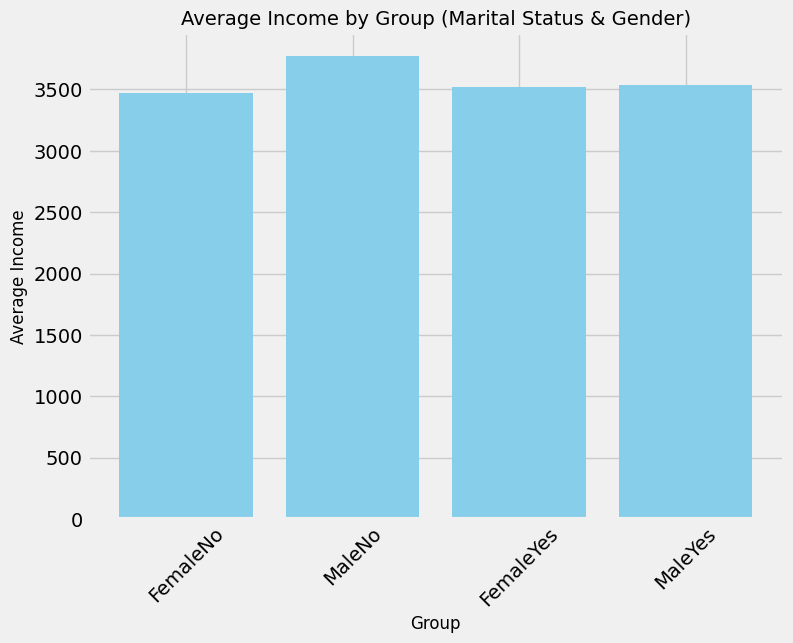

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with relevant columns
# Grouping data by marital status and gender and calculating average income
average_income = df.groupby(['Married', 'Gender'])['ApplicantIncome'].mean().reset_index()

# Combining marital status and gender into a single column for visualization
average_income['Group'] = average_income['Gender'] + average_income['Married']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_income['Group'], average_income['ApplicantIncome'], color='skyblue')
plt.title('Average Income by Group (Marital Status & Gender)', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

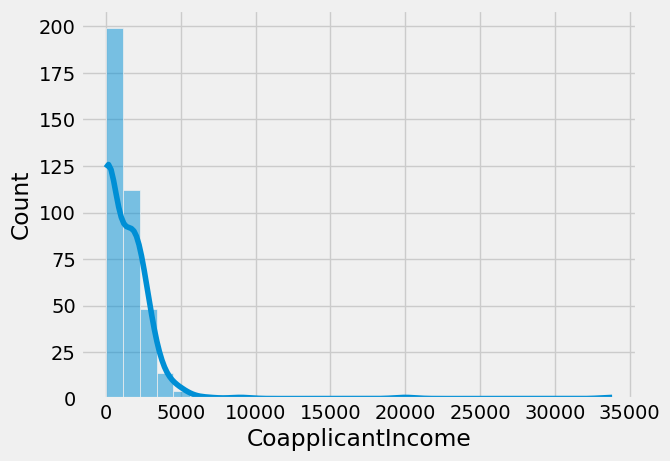

In [6]:
sns.histplot(x = 'CoapplicantIncome', data = df, kde = True,bins = 30)